<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/VRP_Circuit_CP_Wiring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/in/soroudi/

In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
#plt.rcParams["figure.figsize"] = (15,10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [2]:

KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

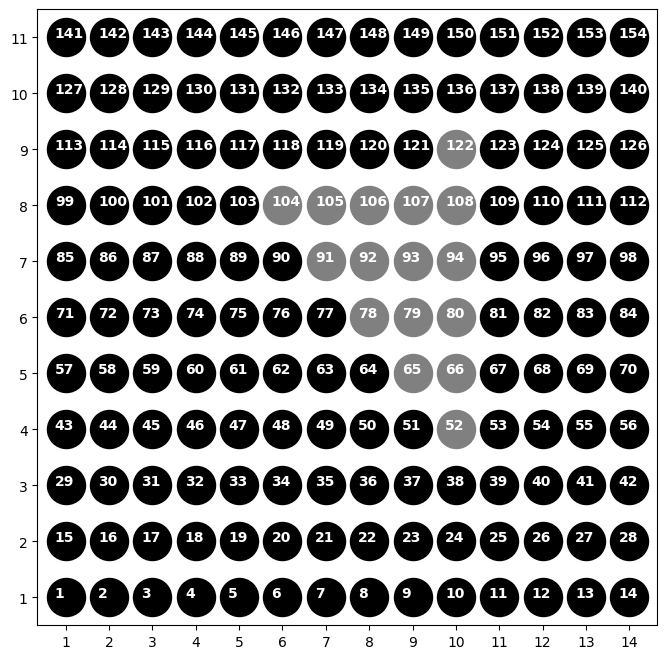

154


In [3]:
nr, nc  = 11, 14
banned = [104,105,106,107,108 , 91, 92,93,94, 78 , 79, 80, 65, 66, 52, 122]

data = {}
counter = 0
plt.figure(figsize=(8,8))
for r in range(1,1+nr):
  for c in range(1,1+nc):
    counter +=1
    data[counter,'x'] = c
    data[counter,'y'] = r
    plt.text(c-0.25,r, s= str(counter), c = 'w', fontweight = 'bold')
    if counter not in banned:
      plt.scatter(c,r, s= 750, c='k')
    else:
      plt.scatter(c,r, s= 750, c='grey')
plt.xticks(range(1,1+nc))
plt.yticks(range(1,1+nr))
plt.show()
print(counter)

In [4]:

nodes = [n for n in range(1,154+1) if n not in banned ]

def dist(i,j,data):
  x1,y1 = data[i,'x'],data[i,'y']
  x2,y2 = data[j,'x'],data[j,'y']
  return int(100*np.sqrt( (x1-x2)**2 +(y1-y2)**2))

dist(1,16,data)

st_fn = {0:(72,139) ,1:(89,110) , 2:(46,96)}

In [5]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
cars = range(3)

U = {(i,j,c):model.NewBoolVar(f"connection_{i}_{j}_{c}")  for c in cars for i in nodes for j in nodes if i!=j and dist(i,j,data) <142}
assign = {(i,c):model.NewBoolVar(f"assign_{i}_{c}")  for c in cars for i in nodes}




for n in nodes:
  expressions = [assign[n,c] for c in cars ]
  model.AddAtMostOne(expressions)
for c in cars:
  (st,fn) = st_fn[c]
  arcs = [(i,j,v) for (i,j,k),v in U.items() if k ==c]
  arc_in_car = arcs + [(n,n,assign[n,c].Not()) for n in nodes ] + [(st,fn,True)]
  model.AddCircuit(arc_in_car)

# Maximize x
expressions = [v*dist(i,j,data) for (i,j,c),v in U.items() ]
model.Minimize(sum(expressions))

status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")


#print(f"x", solver.Value(x))


OPTIMAL


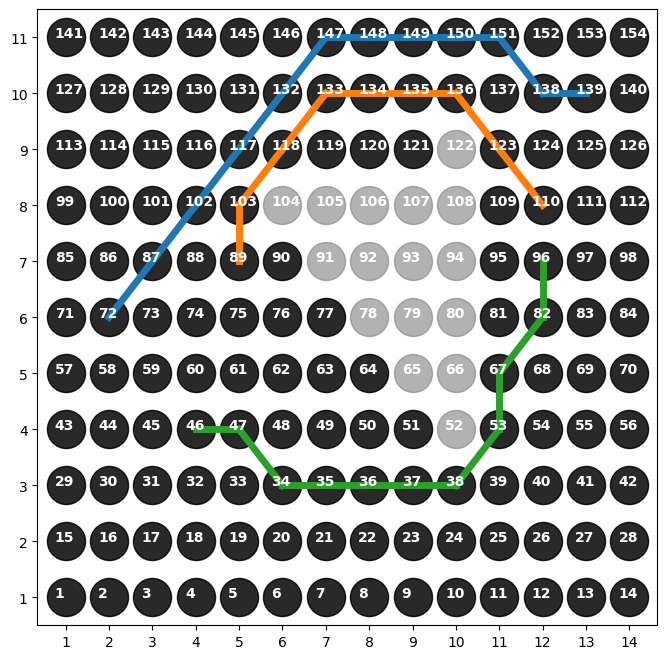

154


In [6]:
plt.figure(figsize=(8,8))

for n in nodes:
    c = data[n,'x']
    r= data[n,'y']
    plt.text(c-0.25,r, s= str(n), c = 'w', fontweight = 'bold')
    plt.scatter(c,r, s= 750, c='k', alpha = 0.2, zorder = -1)
    if n not in banned:
      plt.scatter(c,r, s= 750, c='k', alpha = 0.8)

for n in banned:
    c = data[n,'x']
    r= data[n,'y']
    plt.text(c-0.25,r, s= str(n), c = 'w', fontweight = 'bold')
    plt.scatter(c,r, s= 750, c='grey', alpha = 0.6, zorder = -1)

for (i,j,c), v in U.items():
    if solver.Value(v)>0:
      x1,y1 = data[i,'x'],data[i,'y']
      x2,y2 = data[j,'x'],data[j,'y']
      plt.plot([x1,x2],[y1,y2], lw= 5 , c = KOLORS[c])
    #plt.text(c-0.25,r, s= str(counter), c = 'w', fontweight = 'bold')
    #plt.scatter(c,r, s= 750, c='k')
plt.xticks(range(1,1+nc))
plt.yticks(range(1,1+nr))
plt.show()
print(counter)